# EOSC 454/556B Assignment 2: Question 2
## Analytic Solutions for Interval and RMS Velocity

Student Name: [Your Name]  
Student Number: [Your Number]  
Collaborators: [Names if applicable]

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.interpolate import interp1d

# Set plotting parameters for nice figures
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Question 2(a): Create interval velocity function

We need to create a function for:
$$v_{\text{int}} = v_0 + \alpha\sin(\omega t) + \beta t$$

Parameters:
- $v_0 = 2000$ m/s
- $\alpha = 50$ m/s
- $\beta = 20$ m/s²
- $\omega = 2\pi$ rad/s (assuming f = 1 Hz)
- $0 \leq t \leq 2$ s
- 200 time points

In [3]:
def compute_interval_velocity(t, v0, alpha, beta, omega):
    """
    Compute interval velocity as a function of time.
    
    Parameters:
    -----------
    t : array_like
        Time values (s)
    v0 : float
        Base velocity (m/s)
    alpha : float
        Amplitude of sinusoidal component (m/s)
    beta : float
        Linear trend coefficient (m/s²)
    omega : float
        Angular frequency (rad/s)
    
    Returns:
    --------
    v_int : array_like
        Interval velocity (m/s)
    """
    v_int = v0 + alpha * np.sin(omega * t) + beta * t
    return v_int

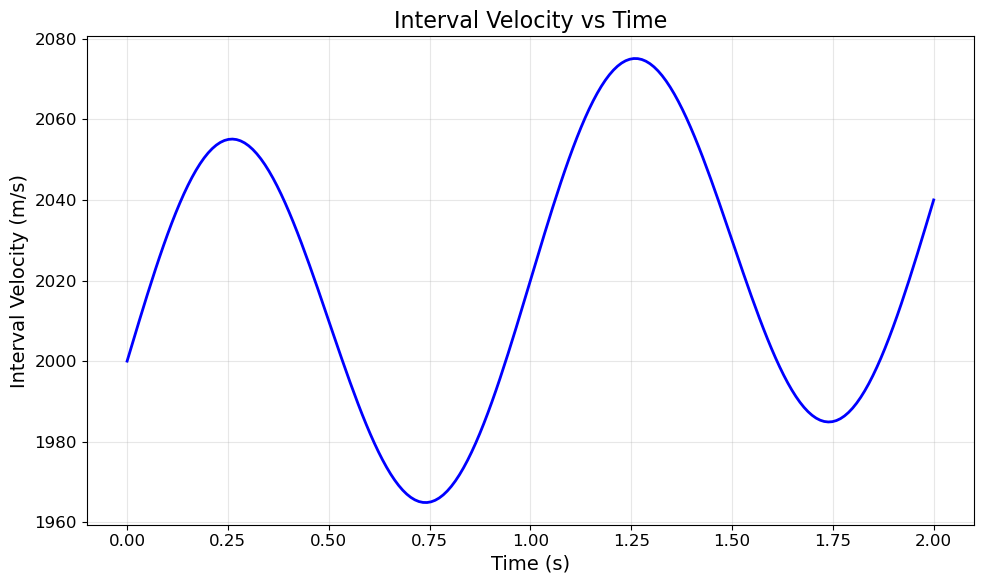

Minimum velocity: 1964.91 m/s
Maximum velocity: 2075.09 m/s


In [4]:
# Define parameters
v0 = 2000  # m/s
alpha = 50  # m/s
beta = 20  # m/s²
f = 1  # Hz (assuming frequency = 1 Hz)
omega = 2 * np.pi * f  # rad/s

# Create time array
n_points = 200
t = np.linspace(0, 2, n_points)  # 0 to 2 seconds

# Compute interval velocity
v_int = compute_interval_velocity(t, v0, alpha, beta, omega)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(t, v_int, 'b-', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Interval Velocity (m/s)', fontsize=14)
plt.title('Interval Velocity vs Time', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('q2a_interval_velocity.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Minimum velocity: {v_int.min():.2f} m/s")
print(f"Maximum velocity: {v_int.max():.2f} m/s")

## Question 2(b): Explore parameter influence

Let's explore how each parameter affects the interval velocity.

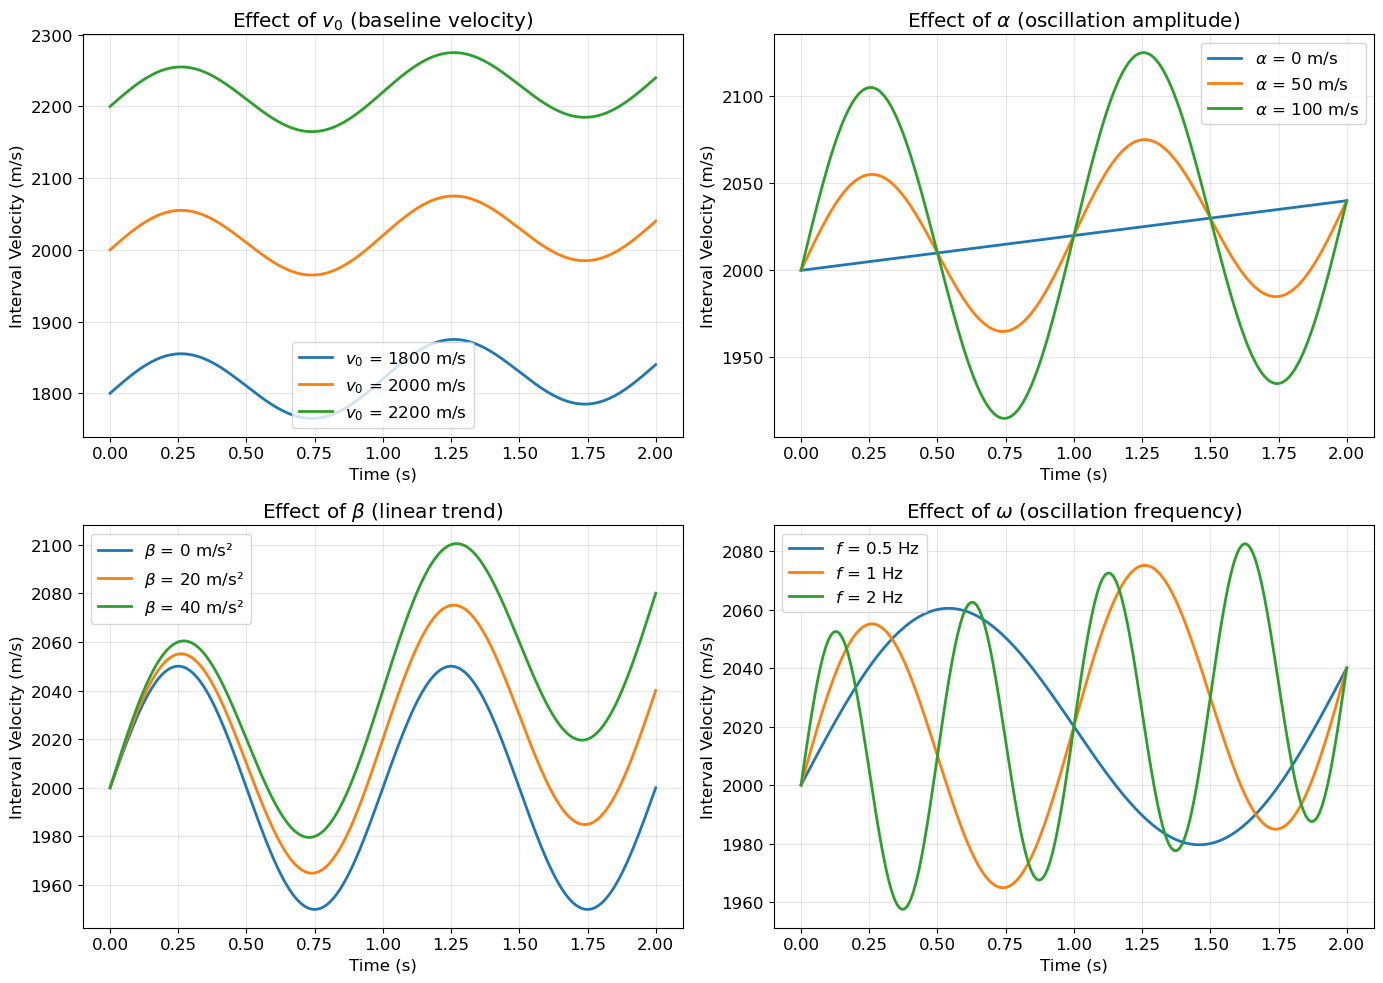

In [5]:
# Create figure with 4 subplots to show effect of each parameter
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Effect of v0 (baseline velocity)
ax = axes[0, 0]
for v0_test in [1800, 2000, 2200]:
    v_test = compute_interval_velocity(t, v0_test, alpha, beta, omega)
    ax.plot(t, v_test, linewidth=2, label=f'$v_0$ = {v0_test} m/s')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Interval Velocity (m/s)')
ax.set_title('Effect of $v_0$ (baseline velocity)')
ax.legend()
ax.grid(True, alpha=0.3)

# Effect of alpha (sinusoidal amplitude)
ax = axes[0, 1]
for alpha_test in [0, 50, 100]:
    v_test = compute_interval_velocity(t, v0, alpha_test, beta, omega)
    ax.plot(t, v_test, linewidth=2, label=f'$\\alpha$ = {alpha_test} m/s')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Interval Velocity (m/s)')
ax.set_title('Effect of $\\alpha$ (oscillation amplitude)')
ax.legend()
ax.grid(True, alpha=0.3)

# Effect of beta (linear trend)
ax = axes[1, 0]
for beta_test in [0, 20, 40]:
    v_test = compute_interval_velocity(t, v0, alpha, beta_test, omega)
    ax.plot(t, v_test, linewidth=2, label=f'$\\beta$ = {beta_test} m/s²')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Interval Velocity (m/s)')
ax.set_title('Effect of $\\beta$ (linear trend)')
ax.legend()
ax.grid(True, alpha=0.3)

# Effect of omega (frequency)
ax = axes[1, 1]
for f_test in [0.5, 1, 2]:
    omega_test = 2 * np.pi * f_test
    v_test = compute_interval_velocity(t, v0, alpha, beta, omega_test)
    ax.plot(t, v_test, linewidth=2, label=f'$f$ = {f_test} Hz')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Interval Velocity (m/s)')
ax.set_title('Effect of $\\omega$ (oscillation frequency)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('q2b_parameter_effects.png', dpi=300, bbox_inches='tight')
plt.show()

**Parameter Interpretations:**

- **$v_0$**: Shifts the entire velocity curve up or down. This is the baseline or reference velocity.
- **$\alpha$**: Controls the amplitude of oscillations. Larger values create larger variations around the baseline.
- **$\beta$**: Controls the linear increase in velocity with time. This represents a constant acceleration.
- **$\omega$**: Controls how fast the oscillations occur. Higher frequency means more cycles in the same time period.

## Question 2(c): Analytic solution for RMS velocity

We need to compute:
$$V_{\text{rms}}^2(t) = \frac{1}{t}\int_0^t v_{\text{int}}^2(u)\,du$$

This integral is challenging to solve analytically. We'll use numerical integration.

In [6]:
def compute_rms_velocity(t, v0, alpha, beta, omega):
    """
    Compute RMS velocity numerically.
    
    Parameters:
    -----------
    t : array_like
        Time values (s)
    v0, alpha, beta, omega : float
        Parameters for interval velocity
    
    Returns:
    --------
    V_rms : array_like
        RMS velocity (m/s)
    """
    V_rms = np.zeros_like(t)
    
    for i, t_val in enumerate(t):
        if t_val == 0:
            # Avoid division by zero; V_rms(0) = v_int(0)
            V_rms[i] = v0
        else:
            # Create integration points from 0 to t_val
            u = np.linspace(0, t_val, 500)
            v_int_u = compute_interval_velocity(u, v0, alpha, beta, omega)
            
            # Integrate v_int^2
            integral = integrate.simpson(v_int_u**2, x=u)
            
            # Compute RMS velocity
            V_rms[i] = np.sqrt(integral / t_val)
    
    return V_rms

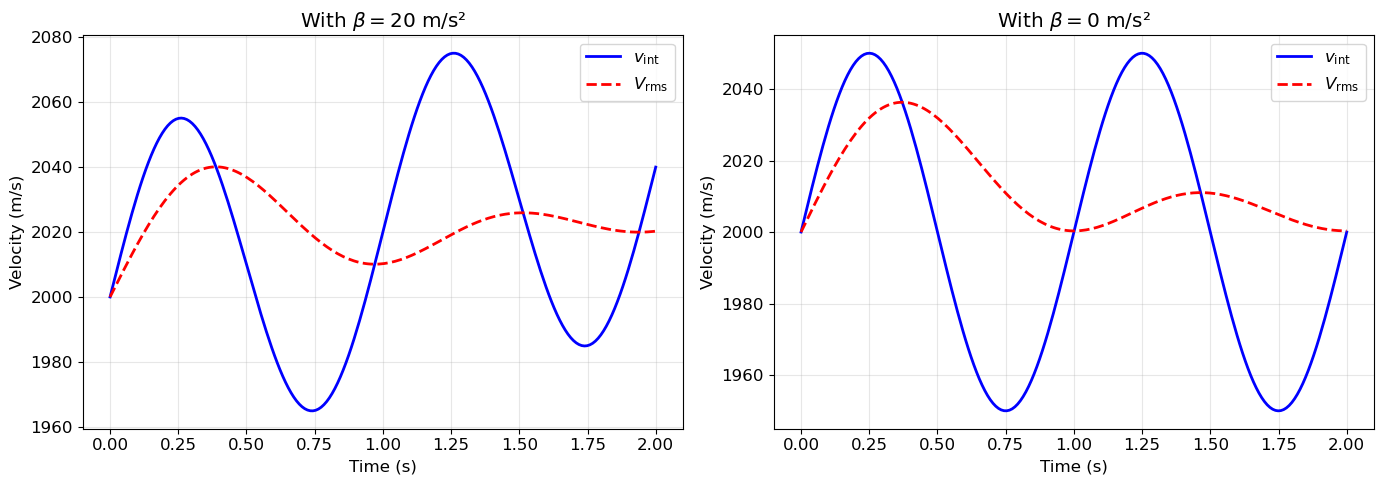

In [7]:
# Case 1: With beta = 20 m/s²
V_rms_with_beta = compute_rms_velocity(t, v0, alpha, beta, omega)

# Case 2: With beta = 0 m/s²
beta_zero = 0
V_rms_no_beta = compute_rms_velocity(t, v0, alpha, beta_zero, omega)

# Plot both cases
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot with beta
ax = axes[0]
ax.plot(t, v_int, 'b-', linewidth=2, label='$v_{\\text{int}}$')
ax.plot(t, V_rms_with_beta, 'r--', linewidth=2, label='$V_{\\text{rms}}$')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('With $\\beta = 20$ m/s²')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot without beta
ax = axes[1]
v_int_no_beta = compute_interval_velocity(t, v0, alpha, beta_zero, omega)
ax.plot(t, v_int_no_beta, 'b-', linewidth=2, label='$v_{\\text{int}}$')
ax.plot(t, V_rms_no_beta, 'r--', linewidth=2, label='$V_{\\text{rms}}$')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('With $\\beta = 0$ m/s²')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('q2c_vrms_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 2(d): Estimate interval velocity from RMS velocity

Using the formula:
$$v_{\text{int}} = V_{\text{rms}}(t)\left[1 + \frac{2tV'_{\text{rms}}(t)}{V_{\text{rms}}(t)}\right]^{1/2}$$

We need to compute the derivative $V'_{\text{rms}}$ using finite differences.

In [8]:
def estimate_interval_from_rms(t, V_rms):
    """
    Estimate interval velocity from RMS velocity using finite differences.
    
    Parameters:
    -----------
    t : array_like
        Time values (s)
    V_rms : array_like
        RMS velocity values (m/s)
    
    Returns:
    --------
    v_int_est : array_like
        Estimated interval velocity (m/s)
    """
    v_int_est = np.zeros_like(V_rms)
    
    # Compute derivative using central differences (interior points)
    dV_dt = np.zeros_like(V_rms)
    
    # Forward difference for first point
    dV_dt[0] = (V_rms[1] - V_rms[0]) / (t[1] - t[0])
    
    # Central difference for interior points
    for i in range(1, len(t) - 1):
        dV_dt[i] = (V_rms[i+1] - V_rms[i-1]) / (t[i+1] - t[i-1])
    
    # Backward difference for last point
    dV_dt[-1] = (V_rms[-1] - V_rms[-2]) / (t[-1] - t[-2])
    
    # Compute interval velocity
    for i, t_val in enumerate(t):
        if t_val == 0:
            v_int_est[i] = V_rms[i]
        else:
            bracket_term = 1 + (2 * t_val * dV_dt[i]) / V_rms[i]
            # Ensure the bracket term is non-negative
            if bracket_term < 0:
                bracket_term = 0
            v_int_est[i] = V_rms[i] * np.sqrt(bracket_term)
    
    return v_int_est

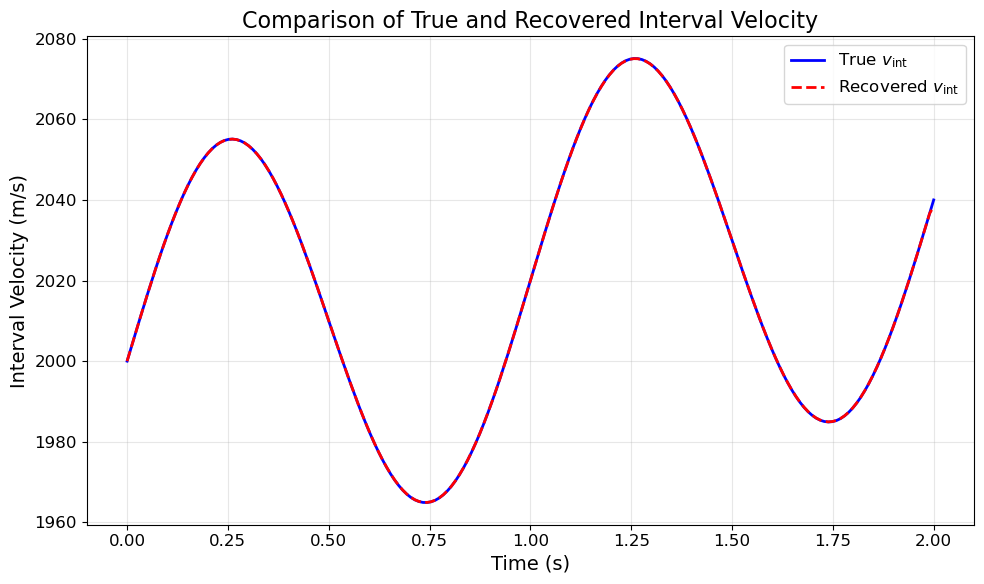

Maximum absolute error: 1.5872 m/s
Mean absolute error: 0.0244 m/s


In [9]:
# Estimate interval velocity from RMS velocity
v_int_recovered = estimate_interval_from_rms(t, V_rms_with_beta)

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(t, v_int, 'b-', linewidth=2, label='True $v_{\\text{int}}$')
plt.plot(t, v_int_recovered, 'r--', linewidth=2, label='Recovered $v_{\\text{int}}$')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Interval Velocity (m/s)', fontsize=14)
plt.title('Comparison of True and Recovered Interval Velocity', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('q2d_recovered_vint.png', dpi=300, bbox_inches='tight')
plt.show()

# Compute error
error = np.abs(v_int - v_int_recovered)
print(f"Maximum absolute error: {error.max():.4f} m/s")
print(f"Mean absolute error: {error.mean():.4f} m/s")

## Summary for Question 2

We have successfully:
1. Created a function to compute interval velocity
2. Explored how each parameter affects the velocity model
3. Computed RMS velocity analytically (numerically integrated)
4. Recovered interval velocity from RMS velocity using finite differences

The recovered interval velocity matches the true interval velocity very well when we have continuous data!